In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Read the data table

pathToData = Path('/Users/csi20/Downloads/Infection_Fabian/CP_Out/MyExpt_Nuclei.txt')

with open(str(pathToData), 'r') as f:
    data = pd.read_table(f) 
    
print(data.shape)

(36435, 29)


In [3]:
# Lets see if the data was imported correctly

data.describe()

,ImageNumber,ObjectNumber,Metadata_C,Metadata_Channel,Metadata_ChannelName,Metadata_ColorFormat,Metadata_FOV,Metadata_FileLocation,Metadata_Frame,Metadata_Plate,...,Metadata_SizeC,Metadata_SizeT,Metadata_SizeX,Metadata_SizeY,Metadata_SizeZ,Metadata_T,Metadata_Well,Metadata_Z,Intensity_IntegratedIntensity_DNA,Intensity_IntegratedIntensity_NP
count,36435.000000,36435.000000,0.0,0.0,0.0,0.0,36435.000000,0.0,36435.0,0.0,...,36435.0,36435.0,0.0,0.0,36435.0,0.0,0.0,0.0,36435.000000,36435.000000
mean,19.958886,475.617813,NaN,NaN,NaN,NaN,3.881899,NaN,0.0,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,337.768636,65.459131
std,12.146614,350.937592,NaN,NaN,NaN,NaN,2.164813,NaN,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,229.968888,71.784169
min,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,0.0,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,32.878432,3.729412
25%,11.000000,208.000000,NaN,NaN,NaN,NaN,2.000000,NaN,0.0,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,197.884319,31.729413
50%,18.000000,415.000000,NaN,NaN,NaN,NaN,4.000000,NaN,0.0,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,288.956866,42.737256
75%,30.000000,648.000000,NaN,NaN,NaN,NaN,5.000000,NaN,0.0,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,378.866674,66.560786
max,44.000000,1768.000000,NaN,NaN,NaN,NaN,9.000000,NaN,0.0,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,6485.686325,1139.027482


In [4]:
# Show the different cell types of this CP analysis 

uniqueValues = data['Metadata_CellType'].unique()
print('Unique elements in column "Metadata_CellType" ')
print(uniqueValues)

Unique elements in column "Metadata_CellType" 
['A549' 'MGLU']


In [5]:
# Show the different conditions of this CP analysis

uniqueValues = data['Metadata_Condition'].unique()
print('Unique elements in column "Metadata_Condition" ')
print(uniqueValues)


Unique elements in column "Metadata_Condition" 
['6h' '6hnew' '8h' 'Neg']


In [6]:
# Select the relevant conditions and cell types

A549_neg   = data[data['Metadata_CellType'].str.contains('A549') & data['Metadata_Condition'].str.contains('Neg')] 
A549_pos8h = data[data['Metadata_CellType'].str.contains('A549') & data['Metadata_Condition'].str.contains('8h')]
A549_pos6h = data[data['Metadata_CellType'].str.contains('A549') & data['Metadata_Condition'].str.contains('6hnew')]

MGLU_neg   = data[data['Metadata_CellType'].str.contains('MGLU') & data['Metadata_Condition'].str.contains('Neg')] 
MGLU_pos8h = data[data['Metadata_CellType'].str.contains('MGLU') & data['Metadata_Condition'].str.contains('8h')]
MGLU_pos6h = data[data['Metadata_CellType'].str.contains('MGLU') & data['Metadata_Condition'].str.contains('6h')]

print(A549_neg.shape)
print(MGLU_pos6h.shape)

(5219, 29)
(6086, 29)


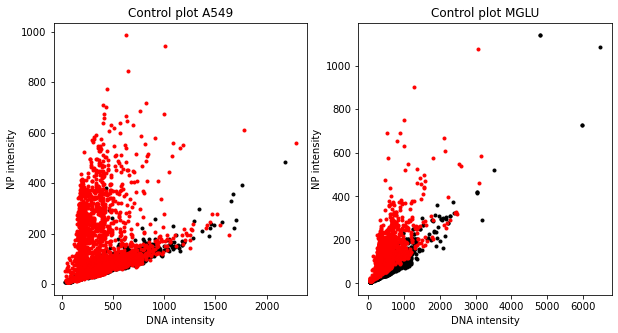

In [7]:
# Plot the positive and negative control

fig = plt.figure(figsize=(10,5))

ax1 = plt.subplot(1,2,1)# number of row = 1, number of columns = 2, subplot order = 1 

plt.scatter(A549_neg.Intensity_IntegratedIntensity_DNA,A549_neg.Intensity_IntegratedIntensity_NP, marker ='.',color='k');
plt.scatter(A549_pos8h.Intensity_IntegratedIntensity_DNA,A549_pos8h.Intensity_IntegratedIntensity_NP, marker ='.',color='r');
ax1.set_title('Control plot A549');
ax1.set_xlabel('DNA intensity');
ax1.set_ylabel('NP intensity');

ax2 = plt.subplot(1,2,2)# number of row = 1, number of columns = 2, subplot order = 1 

plt.scatter(MGLU_neg.Intensity_IntegratedIntensity_DNA,MGLU_neg.Intensity_IntegratedIntensity_NP, marker ='.',color='k');
plt.scatter(MGLU_pos8h.Intensity_IntegratedIntensity_DNA,MGLU_pos8h.Intensity_IntegratedIntensity_NP, marker ='.',color='r');
ax2.set_title('Control plot MGLU');
ax2.set_xlabel('DNA intensity');
ax2.set_ylabel('NP intensity');



In [10]:
# Define a threshold above which cells are counted as infected
# here I use the mean+1*std of the negative control

Threshold_A549 = A549_neg['Intensity_IntegratedIntensity_NP'].mean()+A549_neg['Intensity_IntegratedIntensity_NP'].std();
Threshold_MGLU = MGLU_neg['Intensity_IntegratedIntensity_NP'].mean()+MGLU_neg['Intensity_IntegratedIntensity_NP'].std();

print(Threshold_A549)
print(Threshold_MGLU)


74.78585602890718
110.32522456685786


['Neg', 'Pos 6h', 'Pos 8h']
[0.1090247173788082, 0.13085660198769522, 0.23214285714285715]
['Neg', 'Pos 6h', 'Pos 8h']
[0.06711597865768043, 0.09267170555372987, 0.3544658493870403]


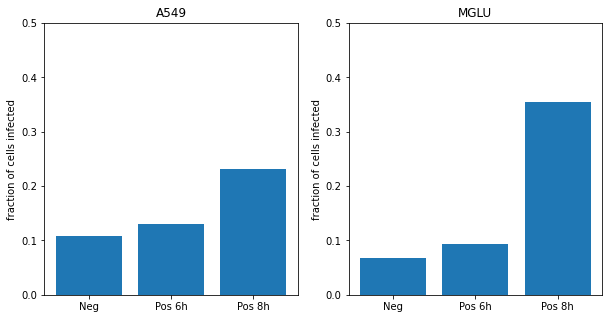

In [12]:
# Count the cells above threshold

Res_A549_Neg = len(A549_neg[A549_neg.Intensity_IntegratedIntensity_NP > Threshold_A549])/len(A549_neg)
Res_A549_Pos8h = len(A549_pos8h[A549_pos8h.Intensity_IntegratedIntensity_NP > Threshold_A549])/len(A549_pos8h)
Res_A549_Pos6h = len(A549_pos6h[A549_pos6h.Intensity_IntegratedIntensity_NP > Threshold_A549])/len(A549_pos6h)

Res_MGLU_Neg = len(MGLU_neg[MGLU_neg.Intensity_IntegratedIntensity_NP > Threshold_MGLU])/len(MGLU_neg)
Res_MGLU_Pos8h = len(MGLU_pos8h[MGLU_pos8h.Intensity_IntegratedIntensity_NP > Threshold_MGLU])/len(MGLU_pos8h)
Res_MGLU_Pos6h = len(MGLU_pos6h[MGLU_pos6h.Intensity_IntegratedIntensity_NP > Threshold_MGLU])/len(MGLU_pos6h)


fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)

samplesA549  = ['Neg','Pos 6h' ,'Pos 8h']
resultA549   = [Res_A549_Neg,Res_A549_Pos6h,Res_A549_Pos8h]
ax1.bar(samplesA549,resultA549)
ax1.set_ylabel('fraction of cells infected');
ax1.set_title('A549');
plt.ylim(0,0.5)

ax2 = plt.subplot(1,2,2)
samplesMGLU  = ['Neg','Pos 6h' ,'Pos 8h']
resultMGLU   = [Res_MGLU_Neg,Res_MGLU_Pos6h,Res_MGLU_Pos8h]
ax2.bar(samplesMGLU,resultMGLU)
ax2.set_ylabel('fraction of cells infected');
ax2.set_title('MGLU');
plt.ylim(0,0.5)

# e.g. copy the result into another application


print(samplesA549)
print(resultA549)

print(samplesMGLU)
print(resultMGLU)